<a href="https://colab.research.google.com/github/Fiarma5233/Data-Science/blob/master/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

L'objectif est d'utiliser la technique de la Simple Linear Regression pour predire l'emission du CO2 des automobiles en fonction de la cylindre

In [1]:


import os

# Chemin du répertoire dans lequel se trouve votre script Python
directory_path = "/content/drive/MyDrive/Coursera/"

# Changer de répertoire vers le répertoire spécifié
os.chdir(directory_path)

Importation des bibliotheques

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
pwd

'/content/drive/MyDrive/Coursera'

Telechargement des donnees

In [4]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2024-06-17 07:48:24--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.07s   

2024-06-17 07:48:24 (974 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



Lecture des donnees

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Coursera/FuelConsumption.csv")

In [6]:
ls


 FuelConsumption.csv  'Simple Linear Regression.ipynb'


In [7]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


Exploration des data

In [8]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Selection certaines caracteristiques a visionner

In [9]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [10]:
df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df.head(6)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230


Visualisons chacune de ces caracteristique

<Axes: >

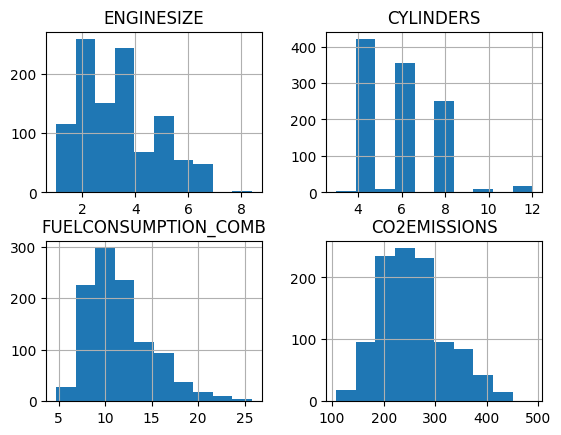

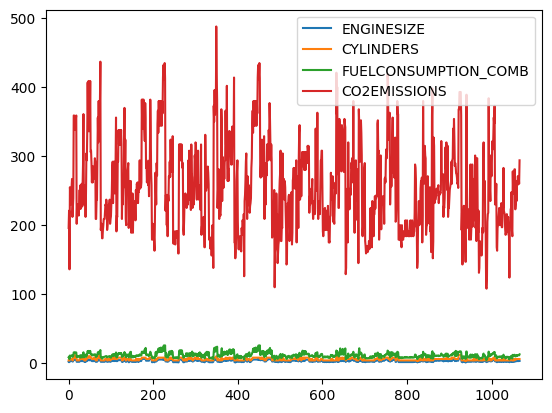

In [11]:
df = df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df.hist()
df.plot()

Visualisons chacune de ces caracteristique en fonction de l'emission pour voir la relation entre elles

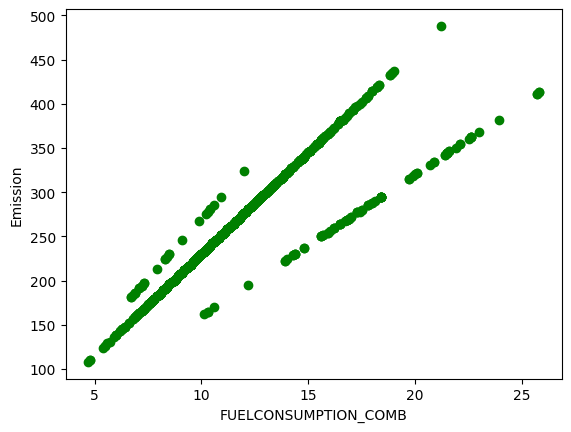

In [12]:
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS, color='green')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission");

Text(0, 0.5, 'Emission')

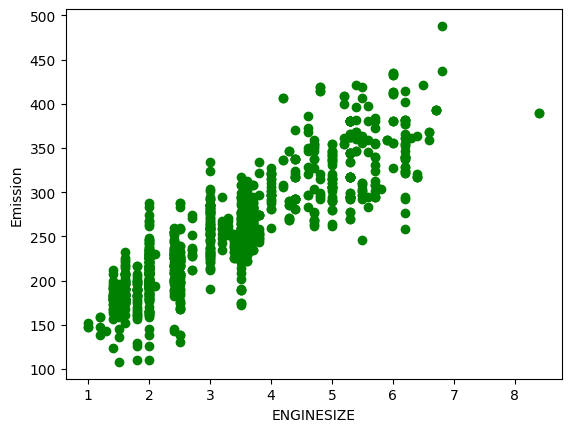

In [13]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS, color='green')
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")

Text(0, 0.5, 'Emission')

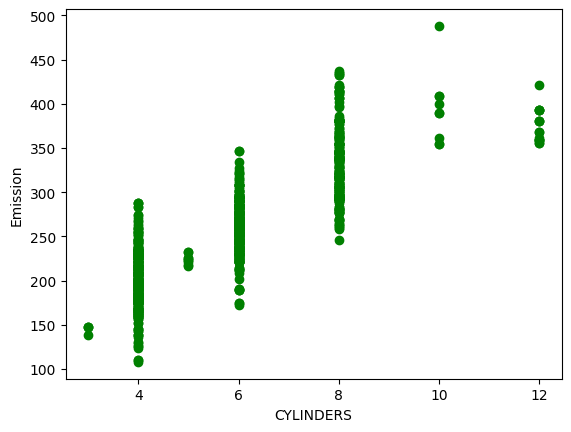

In [14]:
plt.scatter(df.CYLINDERS, df.CO2EMISSIONS, color='green')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")

Separation des donnees en donnees d'entrainement et de  test
Découpons notre ensemble de données en ensembles d'entraînement et de test. 80% de l'ensemble de données entier sera utilisé pour l'entraînement et 20% pour le test. Nous créons un masque pour sélectionner des lignes aléatoires en utilisant la fonction np.random.rand()

In [15]:
msk = np.random.rand(len(df)) <0.8
train = df[msk]
test = df[~msk]

Répartition des données d'entraînement

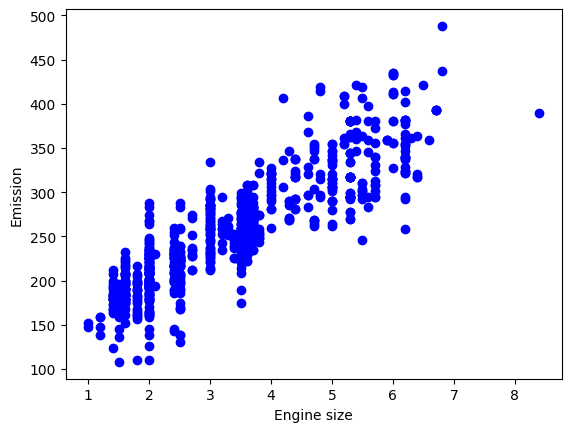

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Modelisation en utilisant le package scklearn

In [17]:
# Importation de la classe LinearRegression de la bibliothèque linear_model de scikit-learn
from sklearn import linear_model

# Initialisation d'un objet LinearRegression appelé 'regr'
regr = linear_model.LinearRegression()

# Sélection de la colonne 'ENGINESIZE' du dataframe 'train' et conversion en tableau NumPy
train_x = np.asanyarray(train[['ENGINESIZE']])

# Sélection de la colonne 'CO2EMISSIONS' du dataframe 'train' et conversion en tableau NumPy
train_y = np.asanyarray(train[['CO2EMISSIONS']])

# Entraînement du modèle LinearRegression sur les données d'entraînement 'train_x' (caractéristiques) et 'train_y' (cibles)
regr.fit(train_x, train_y)

# Affichage des coefficients de la régression linéaire (coefficients de pente de la droite ajustée)
print ('Coefficients: ', regr.coef_)

# Affichage de l'interception (ou biais) de la droite ajustée
print ('Intercept: ',regr.intercept_)


Coefficients:  [[38.87718906]]
Intercept:  [126.04548269]


Visualisation de la sortie

Text(0, 0.5, 'Emission')

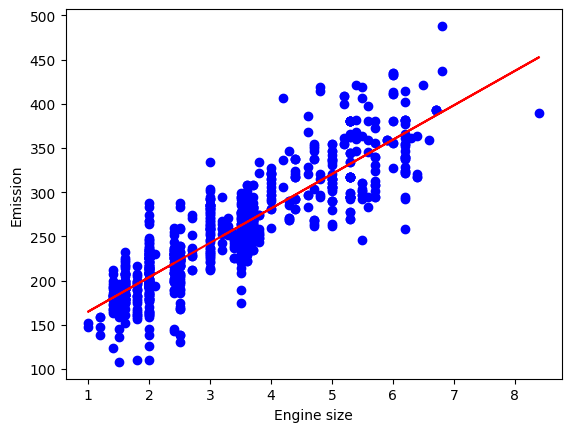

In [18]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [19]:

# importation des metriques
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# Importation de la fonction r2_score de la bibliothèque metrics de scikit-learn
from sklearn.metrics import r2_score

# Sélection de la colonne 'ENGINESIZE' du dataframe entraine 'test' et conversion en tableau NumPy
test_x = np.asanyarray(test[['ENGINESIZE']])

# Sélection de la colonne 'CO2EMISSIONS' du dataframe entraine 'test' et conversion en tableau NumPy
test_y = np.asanyarray(test[['CO2EMISSIONS']])

# Utilisation du modèle de régression linéaire 'regr' pour prédire les valeurs de CO2 (test_y_) à partir des tailles de moteur 'test_x'
test_predict = regr.predict(test_x)


In [20]:
# mesures des erreurs
MAE = mean_absolute_error(test_y, test_predict)
MSE = mean_squared_error(test_y, test_predict)

RMSE = np.sqrt(MSE)

R2 = r2_score(test_y, test_predict)
R2

0.7359535109174193

In [21]:
print(f'Erreur absolue moyenne : {MAE}')
print()

print(f'Erreur quadratique moyenne : {MSE}')
print()

print(f'Racine caree de l\'erreur absolue moyenne : {RMSE}')
print()

print(f'Erreur: {R2}')
print()

Erreur absolue moyenne : 24.99752229717815

Erreur quadratique moyenne : 1064.7576997648605

Racine caree de l'erreur absolue moyenne : 32.63062518194925

Erreur: 0.7359535109174193

